<a href="https://colab.research.google.com/github/Alex-U02/Zajecia/blob/main/zad_klasteryzacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## Zadanie 1
    
Wczytaj dane z pliku **PersonalData.csv**.
    
Oblicz odległość euklidesową \(d(A, B)\) między dwoma wybranymi rekordami \(A\) i \(B\).
    
Zmodyfikuj skalę dla atrybutu **zarobki** (przeskaluj jednostki z tysięcy na złote) i ponownie oblicz odległość euklidesową. Jak zmiana skali wpływa na wynik?
    
Aby wyeliminować wpływ skali, podziel wartość każdego atrybutu przez jego odchylenie standardowe. Oblicz ponownie odległość euklidesową dla przeskalowanych danych.
    
Dla punktów \(A\) i \(B\) oblicz także odległość Minkowskiego oraz odległość miejską (Manhattan).

In [2]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean, minkowski, cityblock

# 1. Wczytanie danych
df = pd.read_csv("PersonalData.csv")

A = df.iloc[0, 1:-1].astype(float)
B = df.iloc[1, 1:-1].astype(float)

print("Rekord A:\n", A)
print("Rekord B:\n", B)

# 2. Odległość euklidesowa
d_euclid = euclidean(A, B)
print("\nOdległość euklidesowa (oryginalne dane):", d_euclid)

# 3. Skalowanie zarobków z tys. na złote
A_scaled = A.copy()
B_scaled = B.copy()
A_scaled['Zarobki (tys.)'] *= 1000
B_scaled['Zarobki (tys.)'] *= 1000

d_euclid_scaled = euclidean(A_scaled, B_scaled)
print("Odległość euklidesowa (zarobki w zł):", d_euclid_scaled)

# 4. Standaryzacja przez odchylenie standardowe
stds = df.iloc[:, 1:-1].std()
A_std = A / stds
B_std = B / stds

d_euclid_std = euclidean(A_std, B_std)
print("Odległość euklidesowa (standaryzowane dane):", d_euclid_std)

# 5. Odległość Minkowskiego (p=3)
d_minkowski = minkowski(A, B, p=3)
print("Odległość Minkowskiego (p=3):", d_minkowski)

# 6. Odległość Manhattan
d_manhattan = cityblock(A, B)
print("Odległość Manhattan:", d_manhattan)


Rekord A:
 Wzrost (cm)       190.0
Waga (kg)          88.0
Staz (lata)         3.0
Zarobki (tys.)      3.5
Ocena (pkt.)        7.0
Piętro              6.0
Dzieci              1.0
Odleglosc (km)     25.0
Name: 0, dtype: float64
Rekord B:
 Wzrost (cm)       172.0
Waga (kg)          70.0
Staz (lata)        12.0
Zarobki (tys.)      4.3
Ocena (pkt.)        5.0
Piętro              1.0
Dzieci              4.0
Odleglosc (km)     12.0
Name: 1, dtype: float64

Odległość euklidesowa (oryginalne dane): 30.604574821421714
Odległość euklidesowa (zarobki w zł): 800.5847862656397
Odległość euklidesowa (standaryzowane dane): 4.0
Odległość Minkowskiego (p=3): 24.524624416199366
Odległość Manhattan: 68.8


## Zadanie 2

Napisz program pozwalający obliczać podobieństwo między sekwencjami DNA traktowanymi jako ciągi znaków.

Zaimplementować na podstawie metryki
$$
D(x, y) = |x| + |y| - 2|LCS(x,y)|
$$

gdzie LCS oznacza najdłuszą wspólna podsekwencję (ang.
longest common subsequence)
  
  (LCS(x,y) = bcde). D(x, y) = 3

In [3]:
def lcs_length(x: str, y: str) -> int:
    m, n = len(x), len(y)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if x[i - 1] == y[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    return dp[m][n]


def get_D_x_y(x: str, y: str) -> int:
    lcs_len = lcs_length(x, y)
    return len(x) + len(y) - 2 * lcs_len


In [4]:
x = "abcde"
y = "bcdxye"
print(get_D_x_y(x, y)) # Oczekiwany wynik 3

X = "AGGTAB"
Y = "GXTXAYB"
print(get_D_x_y(X, Y)) # Oczekiwany wynik 5

3
5


## Zadanie 3

Masz opisy trzech filmów
- `film1 = "kosmiczna stacja astronauta planeta obca"`
- `film2 = "astronauta rakieta księżyc misja kosmiczna"`
- `film3 = "wampir zamek noc krew mroczny"`

a. Stwórz reprezentację wektorową dla każdego filmu używając CountVectorizer

b. Oblicz podobieństwo cosinusowe między wszystkimi parami filmów

c. Które dwa filmy są najbardziej podobne? Które najmniej?

d . Dodaj czwarty film i sprawdź do którego jest najbardziej podobny:
    `film4 = "rakieta mars astronauta czerwona planeta"`

In [5]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# a. Opisy filmów
film1 = "kosmiczna stacja astronauta planeta obca"
film2 = "astronauta rakieta księżyc misja kosmiczna"
film3 = "wampir zamek noc krew mroczny"
film4 = "rakieta mars astronauta czerwona planeta"

films = [film1, film2, film3, film4]

# b. Reprezentacja wektorowa (CountVectorizer)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(films)

print("Słownik cech:", vectorizer.get_feature_names_out())
print("Macierz wektorów (CountVectorizer):\n", X.toarray())

# c. Podobieństwo cosinusowe
cos_sim = cosine_similarity(X)
print("\nMacierz podobieństwa cosinusowego:\n", cos_sim)

pairs = [(i, j, cos_sim[i, j]) for i in range(3) for j in range(i+1, 3)]
pairs_sorted = sorted(pairs, key=lambda x: x[2], reverse=True)

most_similar = pairs_sorted[0]
least_similar = pairs_sorted[-1]

print(f"\nNajbardziej podobne filmy: Film{most_similar[0]+1} i Film{most_similar[1]+1}, podobieństwo = {most_similar[2]:.3f}")
print(f"Najmniej podobne filmy: Film{least_similar[0]+1} i Film{least_similar[1]+1}, podobieństwo = {least_similar[2]:.3f}")

# d. Sprawdzenie do którego film4 jest najbardziej podobny
pairs_film4 = [(i, cos_sim[3, i]) for i in range(3)]
best_match = max(pairs_film4, key=lambda x: x[1])

print(f"\nFilm4 jest najbardziej podobny do Film{best_match[0]+1}, podobieństwo = {best_match[1]:.3f}")


Słownik cech: ['astronauta' 'czerwona' 'kosmiczna' 'krew' 'księżyc' 'mars' 'misja'
 'mroczny' 'noc' 'obca' 'planeta' 'rakieta' 'stacja' 'wampir' 'zamek']
Macierz wektorów (CountVectorizer):
 [[1 0 1 0 0 0 0 0 0 1 1 0 1 0 0]
 [1 0 1 0 1 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 1 1 0 0 0 0 1 1]
 [1 1 0 0 0 1 0 0 0 0 1 1 0 0 0]]

Macierz podobieństwa cosinusowego:
 [[1.  0.4 0.  0.4]
 [0.4 1.  0.  0.4]
 [0.  0.  1.  0. ]
 [0.4 0.4 0.  1. ]]

Najbardziej podobne filmy: Film1 i Film2, podobieństwo = 0.400
Najmniej podobne filmy: Film2 i Film3, podobieństwo = 0.000

Film4 jest najbardziej podobny do Film1, podobieństwo = 0.400


## Zadanie 4

A. Wczytaj dane z pliku **k_means_data.csv.**

B. Zastosuj **algorytm hierarchiczny aglomeracyjny** i wyszukaj w zbiorze danych klastry.

C. Zastosuj **algorytm k-średnich** i wyszukaj w zbiorze danych klastry.

Wymiary danych: (80, 2)


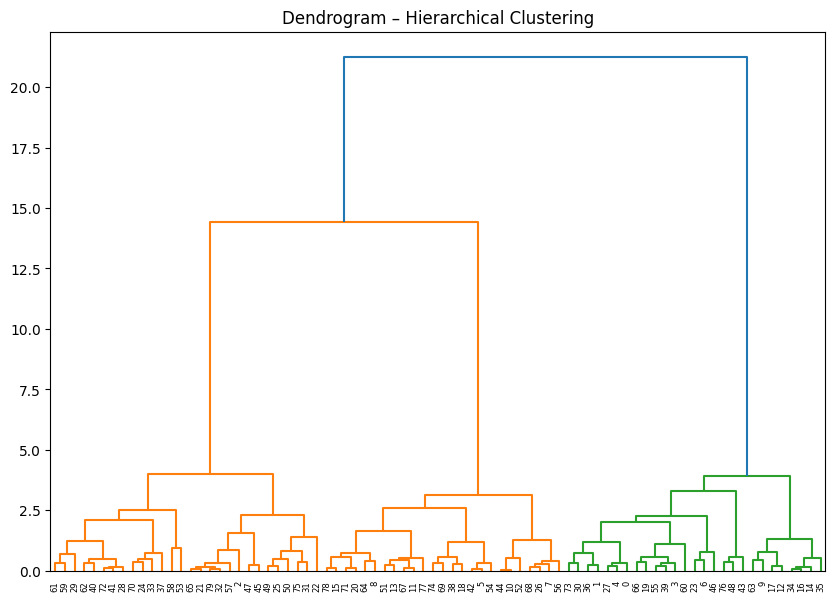

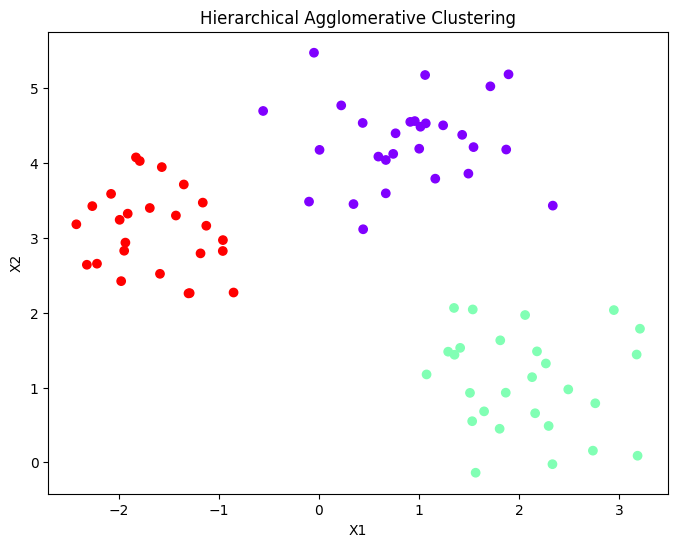

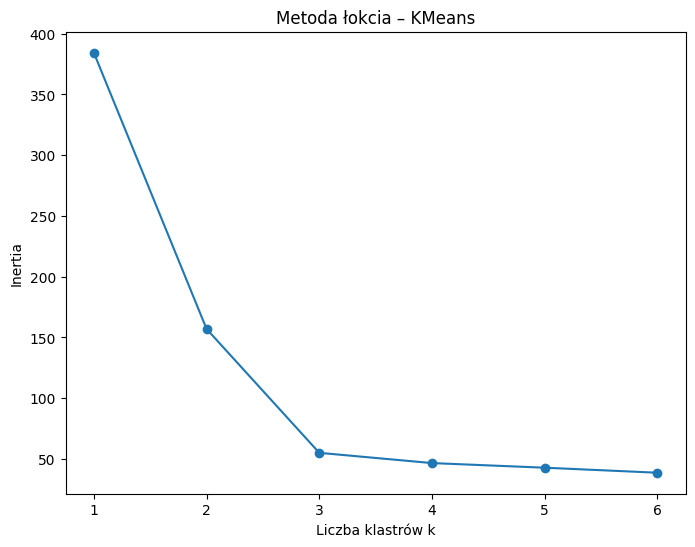

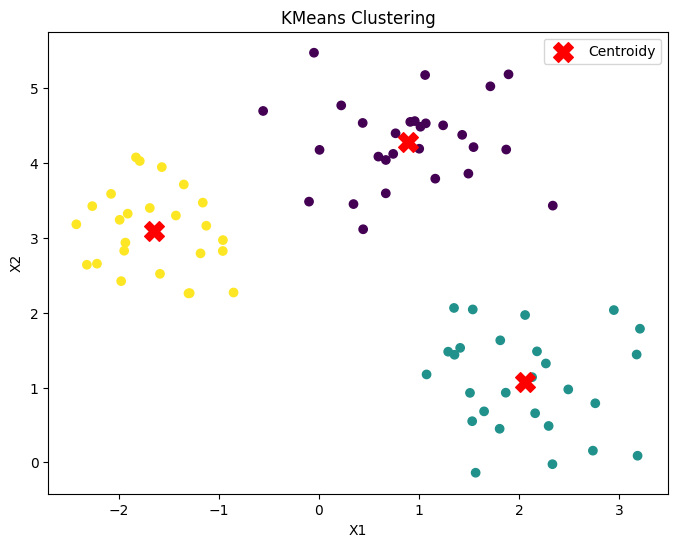

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# A. Wczytanie danych
df = pd.read_csv("k_means_data.csv")
X = df.values
print("Wymiary danych:", X.shape)

# B. Algorytm hierarchiczny aglomeracyjny
linked = linkage(X, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram – Hierarchical Clustering")
plt.show()

agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg_cluster.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='rainbow')
plt.title("Hierarchical Agglomerative Clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# C. Algorytm k-średnich
inertias = []
ks = range(1, 7)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel("Liczba klastrów k")
plt.ylabel("Inertia")
plt.title("Metoda łokcia – KMeans")
plt.xticks(ks)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroidy')
plt.title("KMeans Clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()


## Zadanie 5

Zaimplementuj samodzielnie **algorytm k-średnich** dla danych z pliku **k_means_data.csv**.

Centroidy:
 [[ 2.27623543  0.71888946]
 [ 1.76095884  1.84372698]
 [-0.35552888  3.72714403]]


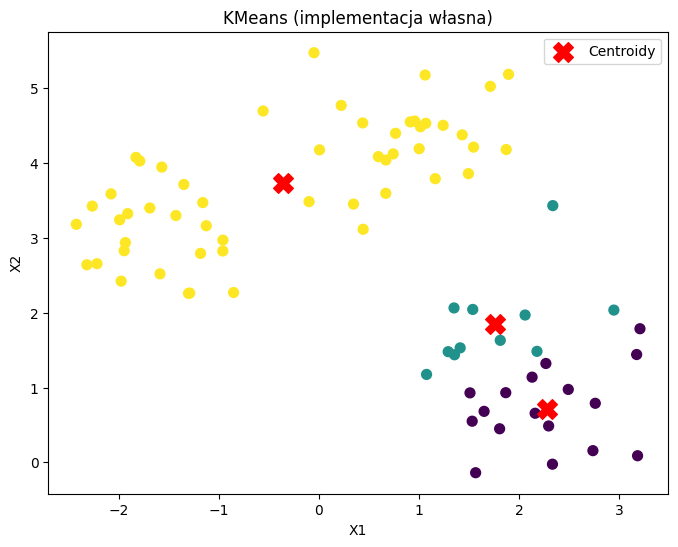

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("k_means_data.csv")
X = df.values

def kmeans(X, k=3, max_iters=100, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape

    centroids = X[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

labels, centroids = kmeans(X, k=3)

print("Centroidy:\n", centroids)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroidy')
plt.title("KMeans (implementacja własna)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()


## Zadanie 6

1. Załaduj zbiór danych **iris**.
Opis zbioru: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
2. Narysuj wykres rozrzutu dla współrzędnych **sepal_length** i **sepal_width**. Oznacz różnymi
kolorami i marklami różne klasy kwiatów.
3. Znajdź wartości **minimalne, maksymalne** oraz **średnie odchylenie kwadratowe** dla atrybutów zbioru.
4. Policz **współczynniki korelacji** między atrybutami.
5. Zastosuj **algorytm k-średnich** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.
6. Zastosuj **algorytm hierarchiczny aglomeracyjny** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.

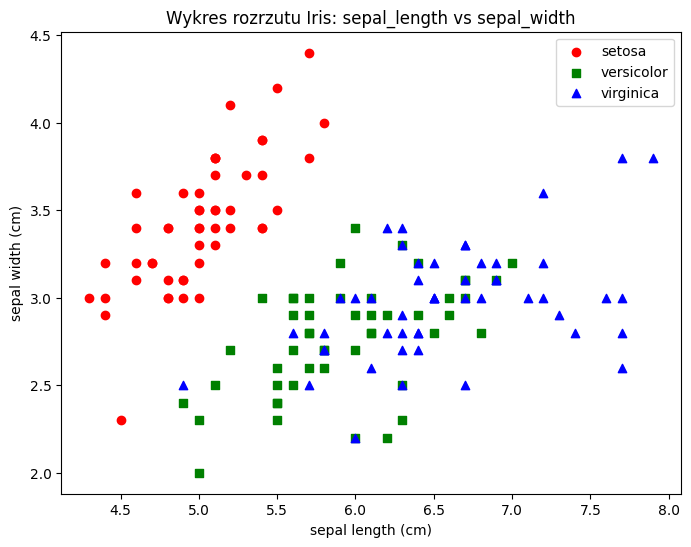


Minimalne wartości:
 sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

Maksymalne wartości:
 sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

Średnie odchylenie kwadratowe (wariancja):
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

Macierz korelacji:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)       

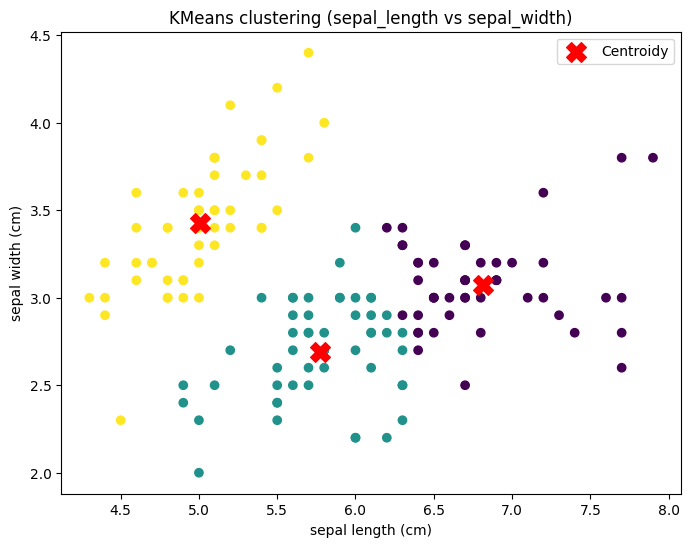

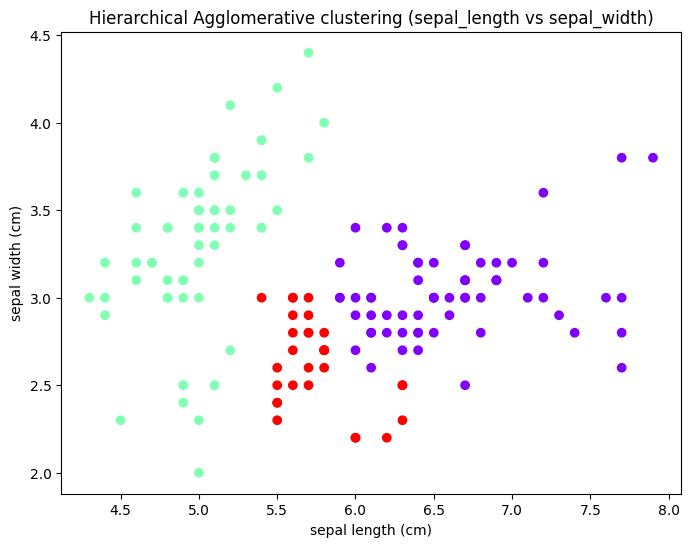

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering

# 1. Zbiór danych iris
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# 2. Wykres rozrzutu dla sepal_length i sepal_width
plt.figure(figsize=(8,6))
markers = ['o','s','^']
colors = ['red','green','blue']
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X.iloc[y==i,0], X.iloc[y==i,1],
                marker=markers[i], color=colors[i], label=target_name)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Wykres rozrzutu Iris: sepal_length vs sepal_width')
plt.legend()
plt.show()

# 3. Min, max, wariancja
min_vals = X.min()
max_vals = X.max()
var_vals = X.var()

print("\nMinimalne wartości:\n", min_vals)
print("\nMaksymalne wartości:\n", max_vals)
print("\nŚrednie odchylenie kwadratowe (wariancja):\n", var_vals)

# 4. Współczynniki korelacji
corr_matrix = X.corr()
print("\nMacierz korelacji:\n", corr_matrix)

# 5. KMeans clustering dla sepal_length i sepal_width
X_sepal = X[['sepal length (cm)','sepal width (cm)']]
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_sepal)

plt.figure(figsize=(8,6))
plt.scatter(X_sepal.iloc[:,0], X_sepal.iloc[:,1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='red', marker='X', label='Centroidy')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('KMeans clustering (sepal_length vs sepal_width)')
plt.legend()
plt.show()

# 6. Hierarchical Agglomerative clustering dla sepal_length i sepal_width
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_sepal)

plt.figure(figsize=(8,6))
plt.scatter(X_sepal.iloc[:,0], X_sepal.iloc[:,1], c=agg_labels, cmap='rainbow')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Hierarchical Agglomerative clustering (sepal_length vs sepal_width)')
plt.show()


## Zadanie 7
Dla danych z pliku penguins.csv wykonaj polecenia

Wyświetl podstawowe informacje o zbiorze.
1. Sprawdź czy w zbiorze nie brakuje danych. Jeżeli są – usuń je ().
2. Ogranicz się do atrybutów **bill_length_mm** i **flipper_length_mm**.
3. Narysuj dendogram, zinterpretuj go i wyznacz ilość klastrów.
4. Zastosuj algorytm hierarchiczny aglomeracyjny do zbioru i wyznacz klastry.
5. Stwórz wykres rozrzutu z zaznaczonymi klastrami.

W **punktach 3-5** przetestuj różne sposoby obliczenia odległości między klastrami (linkage-complete, average, single, ward).

Dane z https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv


--- Podstawowe informacje o zbiorze ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
       species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      344     344      342.000000     342.000000         342.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       152     168             NaN            NaN        

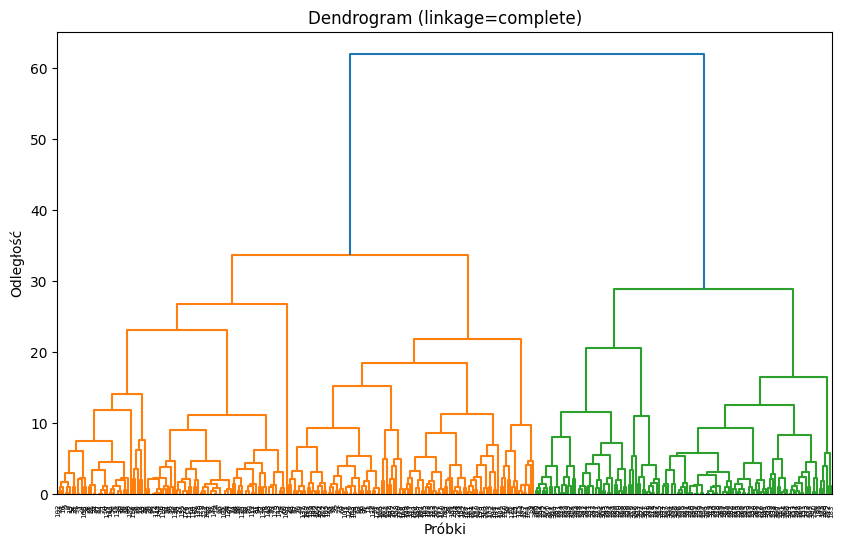

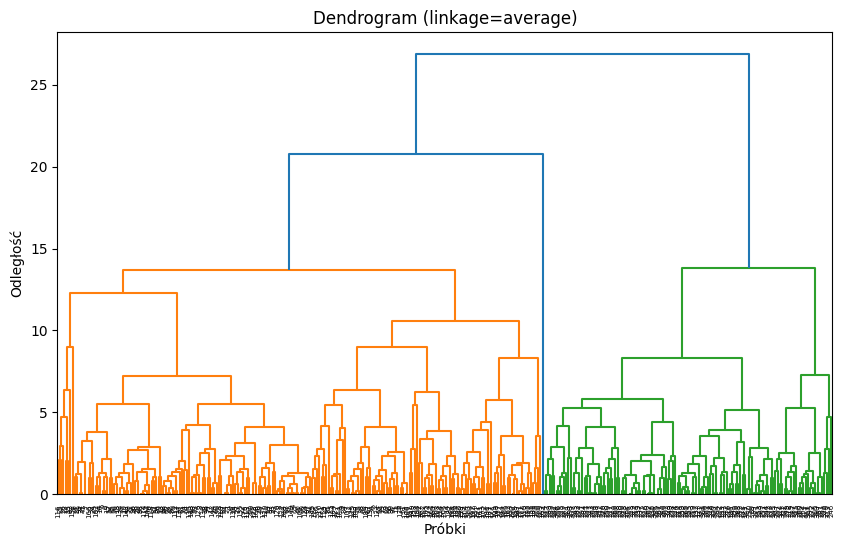

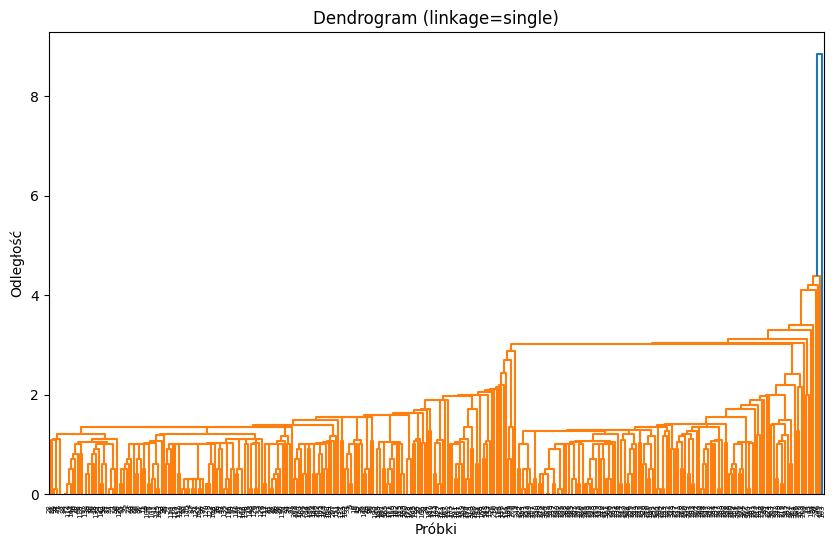

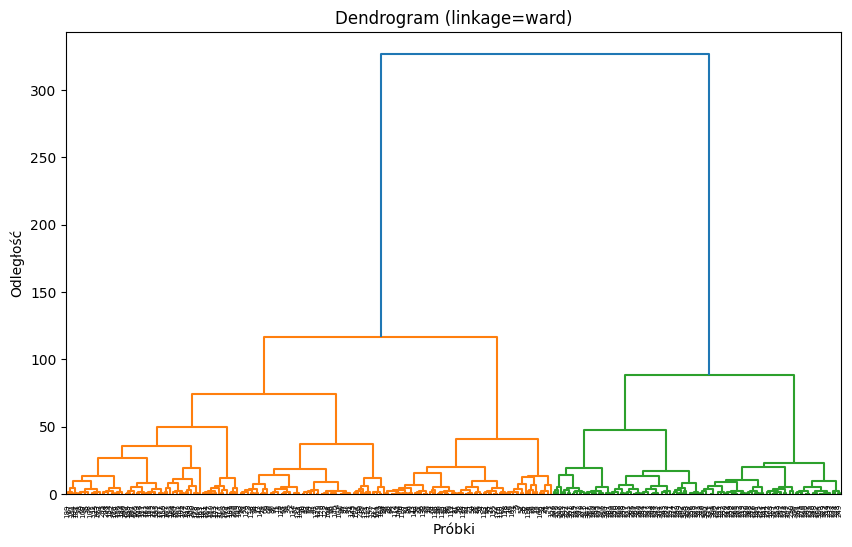

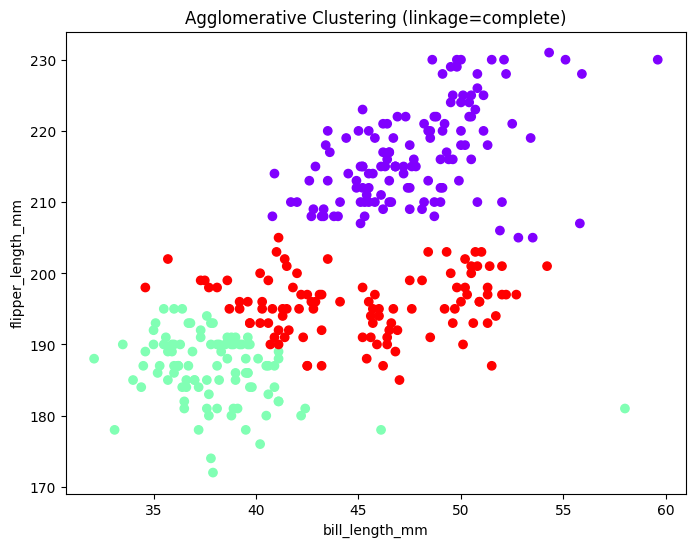

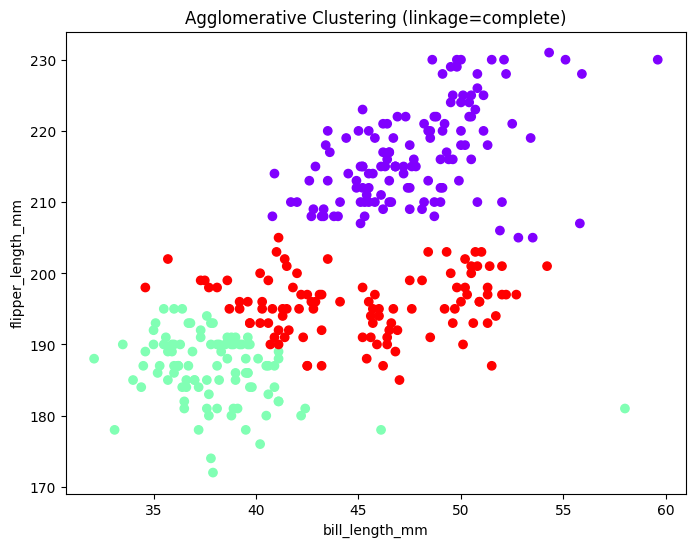

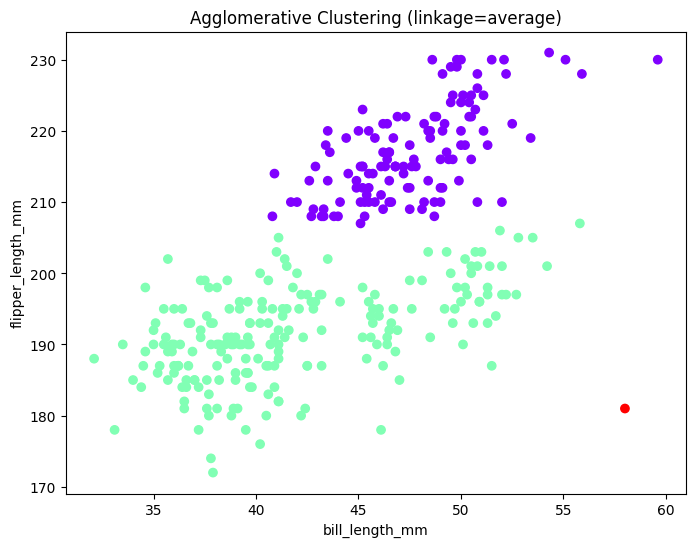

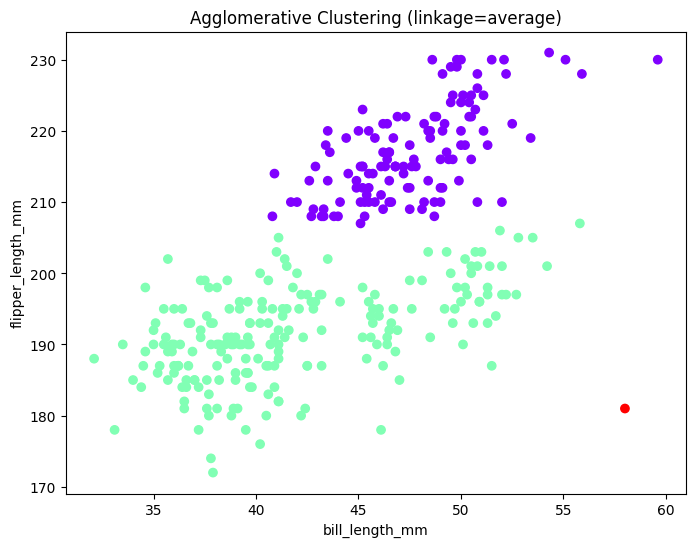

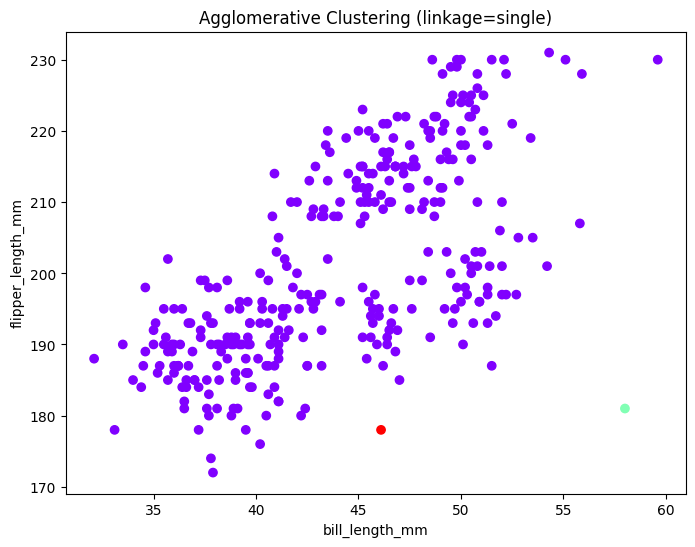

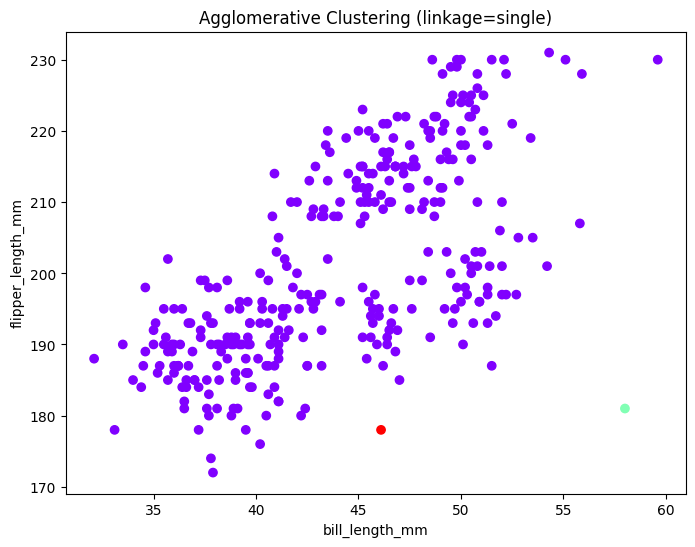

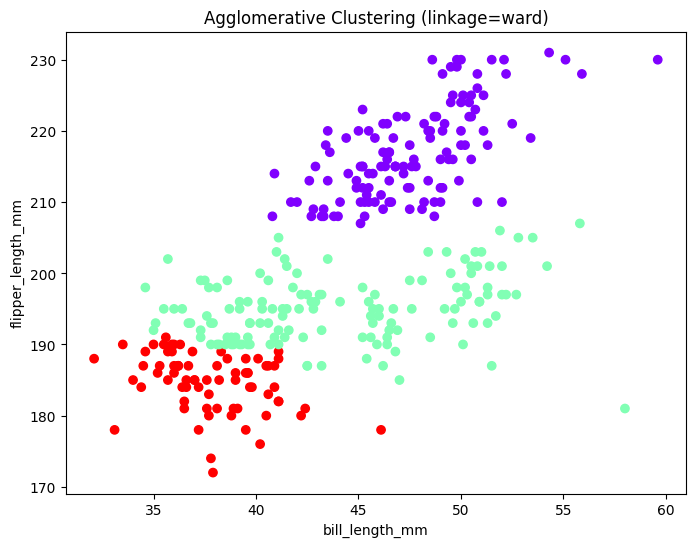

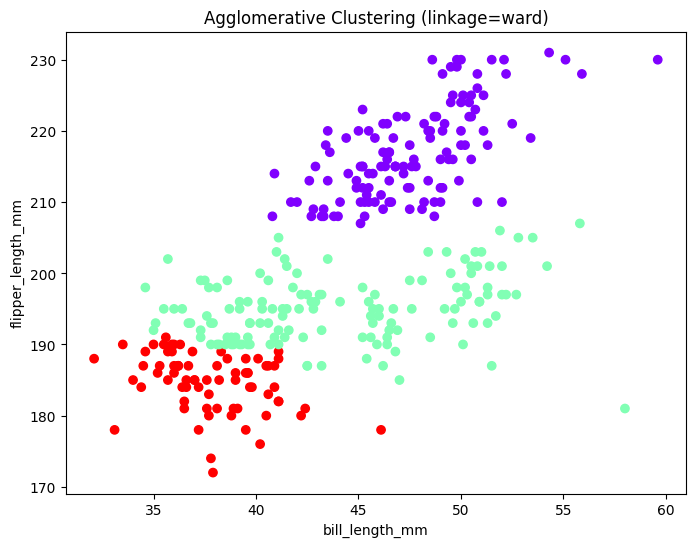

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv("penguins.csv")
print("\n--- Podstawowe informacje o zbiorze ---")
print(df.info())
print(df.describe(include='all'))

# 1. Sprawdź czy w zbiorze nie brakuje danych. Jeżeli są – usuń je
print("\n--- Liczba braków danych ---")
print(df.isnull().sum())
df_clean = df.dropna()
print("\nPo usunięciu braków:", df_clean.shape)

# 2. Ogranicz się do atrybutów bill_length_mm i flipper_length_mm
X = df_clean[['bill_length_mm', 'flipper_length_mm']].values

# 3. Narysuj dendrogram, zinterpretuj go i wyznacz ilość klastrów
methods = ['complete', 'average', 'single', 'ward']
for method in methods:
    linked = linkage(X, method=method)
    plt.figure(figsize=(10, 6))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
    plt.title(f"Dendrogram (linkage={method})")
    plt.xlabel("Próbki")
    plt.ylabel("Odległość")
    plt.show()

# 4. Zastosuj algorytm hierarchiczny aglomeracyjny do zbioru i wyznacz klastry
for method in methods:
    if method == 'ward':
        agg = AgglomerativeClustering(n_clusters=3, linkage=method)
    else:
        agg = AgglomerativeClustering(n_clusters=3, linkage=method, metric='euclidean')

    labels = agg.fit_predict(X)

    # 6. Wykres rozrzutu z klastrami
    plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
    plt.xlabel("bill_length_mm")
    plt.ylabel("flipper_length_mm")
    plt.title(f"Agglomerative Clustering (linkage={method})")
    plt.show()


    # 5. Stwórz wykres rozrzutu z zaznaczonymi klastrami
    plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
    plt.xlabel("bill_length_mm")
    plt.ylabel("flipper_length_mm")
    plt.title(f"Agglomerative Clustering (linkage={method})")
    plt.show()


In [9]:
df

,# X1,X2
0,2.131415,1.138857
1,2.161723,0.656595
2,1.062696,5.176351
3,1.807096,0.449191
4,2.269087,1.321608
...,...,...
75,1.494932,3.858488
76,3.209033,1.785973
77,-2.421659,3.181517
78,-1.931504,2.936981
